### 1. Prepare Problem
a) Load Libraries
b) Load Dataset

Goal: Utilize the LA Housing dataset with 21 features to predict the Price of a given house.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import joblib

_DO NOT RUN THE WHOLE NOTEBOOK AGAIN : Results might not be reproducible as some cells were re-run and errors might arise for undeclared variables_

In [24]:
df = pd.read_csv('housing.csv')

In [25]:
df.head(5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 2. Summarize Data/ Exploratory Data Analysis
a) Descriptive statistics
b) Data visualizations

In [26]:
df.isna().sum()

Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [27]:
df[df['bedrooms'].isna()]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,875,6306400140,20140612T000000,1095000.0,NaN,NaN,3064,4764,3.5,0,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3119,3918400017,20150205T000000,380000.0,NaN,NaN,1470,979,3.0,0,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,3467,1453602309,20140805T000000,288000.0,NaN,1.50,1430,1650,3.0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,4868,6896300380,20141002T000000,228000.0,NaN,1.00,390,5900,1.0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,6994,2954400190,20140624T000000,1295650.0,NaN,NaN,4810,28008,2.0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,8477,2569500210,20141117T000000,339950.0,NaN,2.50,2290,8319,2.0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,8484,2310060040,20140925T000000,240000.0,NaN,2.50,1810,5669,2.0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,9773,3374500520,20150429T000000,355000.0,NaN,NaN,2460,8049,2.0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,9854,7849202190,20141223T000000,235000.0,NaN,NaN,1470,4800,2.0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,12653,7849202299,20150218T000000,320000.0,NaN,2.50,1490,7111,2.0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [28]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

### Visualizations and Insights

##### Correlation Pair-Plot

/home/crow/miniconda3/envs/small-projects-ml/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/crow/miniconda3/envs/small-projects-ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/crow/miniconda3/envs/small-projects-ml/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/crow/miniconda3/envs/small-projects-ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

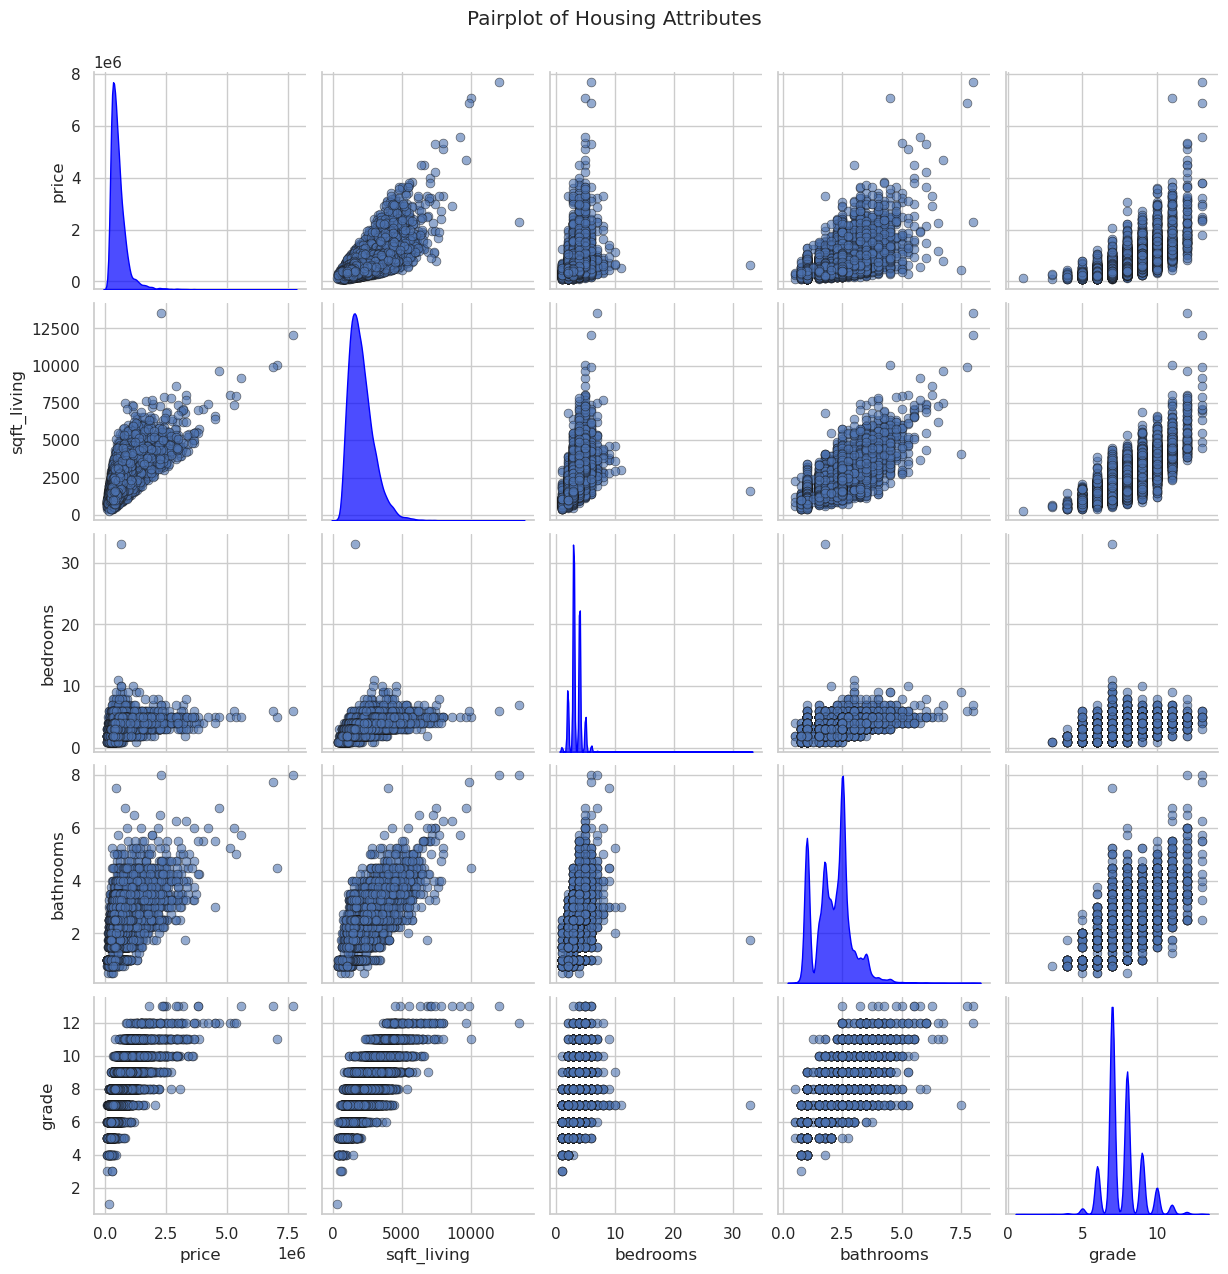

In [30]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a pairplot with enhanced aesthetics
pairplot = sns.pairplot(
    df[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'grade']],
    plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'},  # Adjust point transparency, size, and border color
    diag_kws={'color': 'blue', 'alpha': 0.7},  # Color and transparency of diag plots
    palette='viridis',  # Color palette for different levels of "grade" or other categorical variables
    diag_kind='kde',  # Kind of plot for the diagonal subplots (histogram "hist", kernel density "kde")
    kind='scatter'  # Kind of plot for the off-diagonal elements
)

# Add a title to the pairplot
pairplot.fig.suptitle('Pairplot of Housing Attributes', y=1.02)

# Show the plot
plt.show()

##### Heatmap

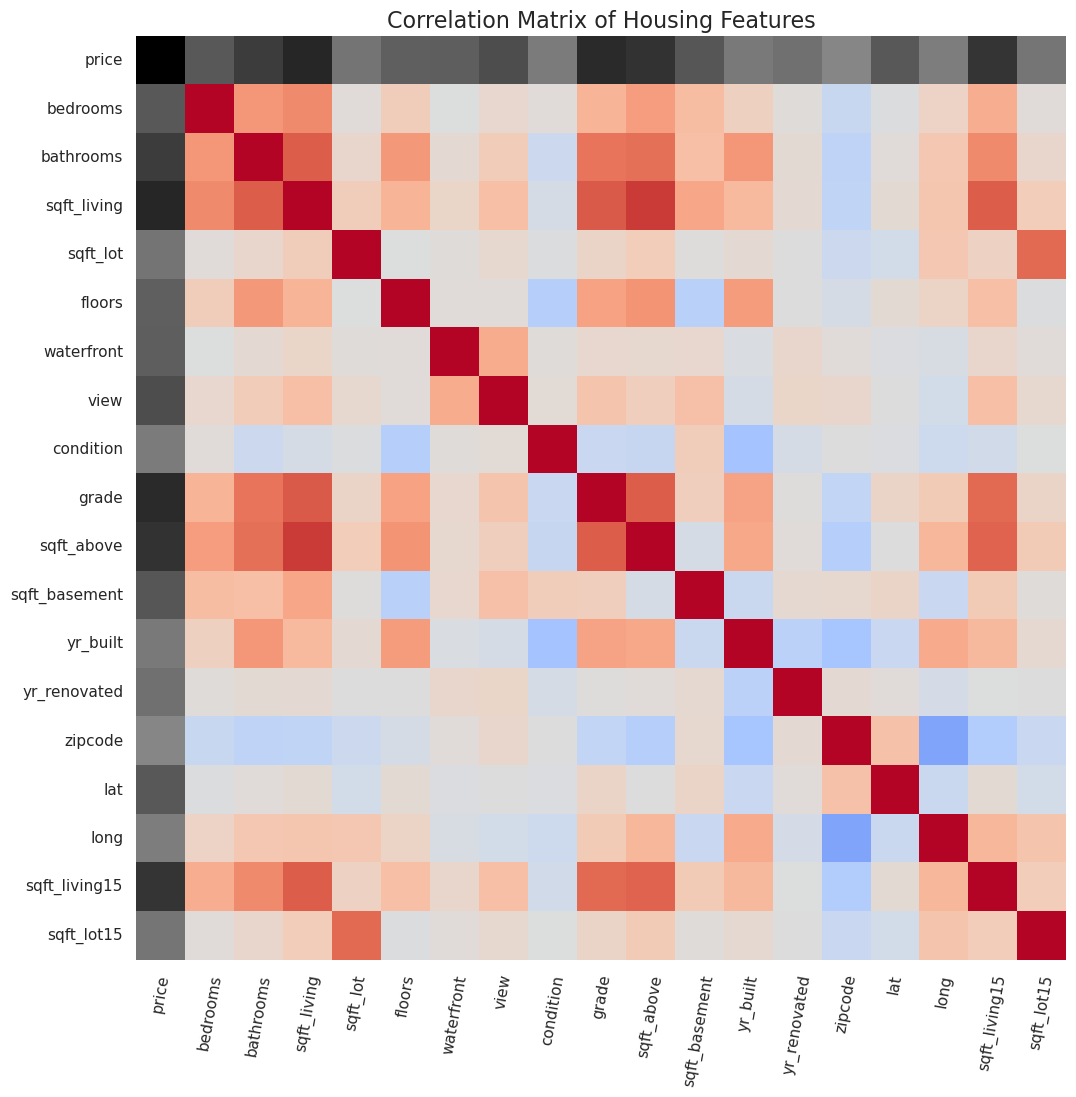

In [9]:
plt.figure(figsize=(12, 12))

# Calculate correlation matrix
correlation_matrix = df.iloc[:, 3:].corr()

# Mask to separate the price column and row for visual emphasis
price_mask = np.full(correlation_matrix.shape, True)
price_index = correlation_matrix.columns.get_loc('price')
price_mask[:, price_index] = False  # Unmask the 'price' column
price_mask[price_index, :] = False  # Unmask the 'price' row

# Plotting the general heatmap
sns.heatmap(correlation_matrix, fmt=".2f", cmap='binary', center=0, mask=price_mask, cbar=False)

# Overlay the 'price' column and row with a different color map
sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm', center=0, mask=~price_mask, cbar=False)

# Title and labels
plt.title('Correlation Matrix of Housing Features', fontsize=16)
plt.xticks(rotation=80)
plt.yticks(rotation=0)

plt.show()

**Key insights at first glance:**
1. `date` column is object type and has incorrect format.
2. `bedrooms` and `bathrooms` have missing values.
3. `yr_renovated` has many zeros which does not make sense for a year column.

Let us address these one by one:

##### Cleaning and Converting Dates

In [31]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
# Cleaning and converting dates

# Show the first few entries to confirm it worked
print(df['date'].head())

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]


##### Time Series Analyis

/home/crow/miniconda3/envs/small-projects-ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/crow/miniconda3/envs/small-projects-ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


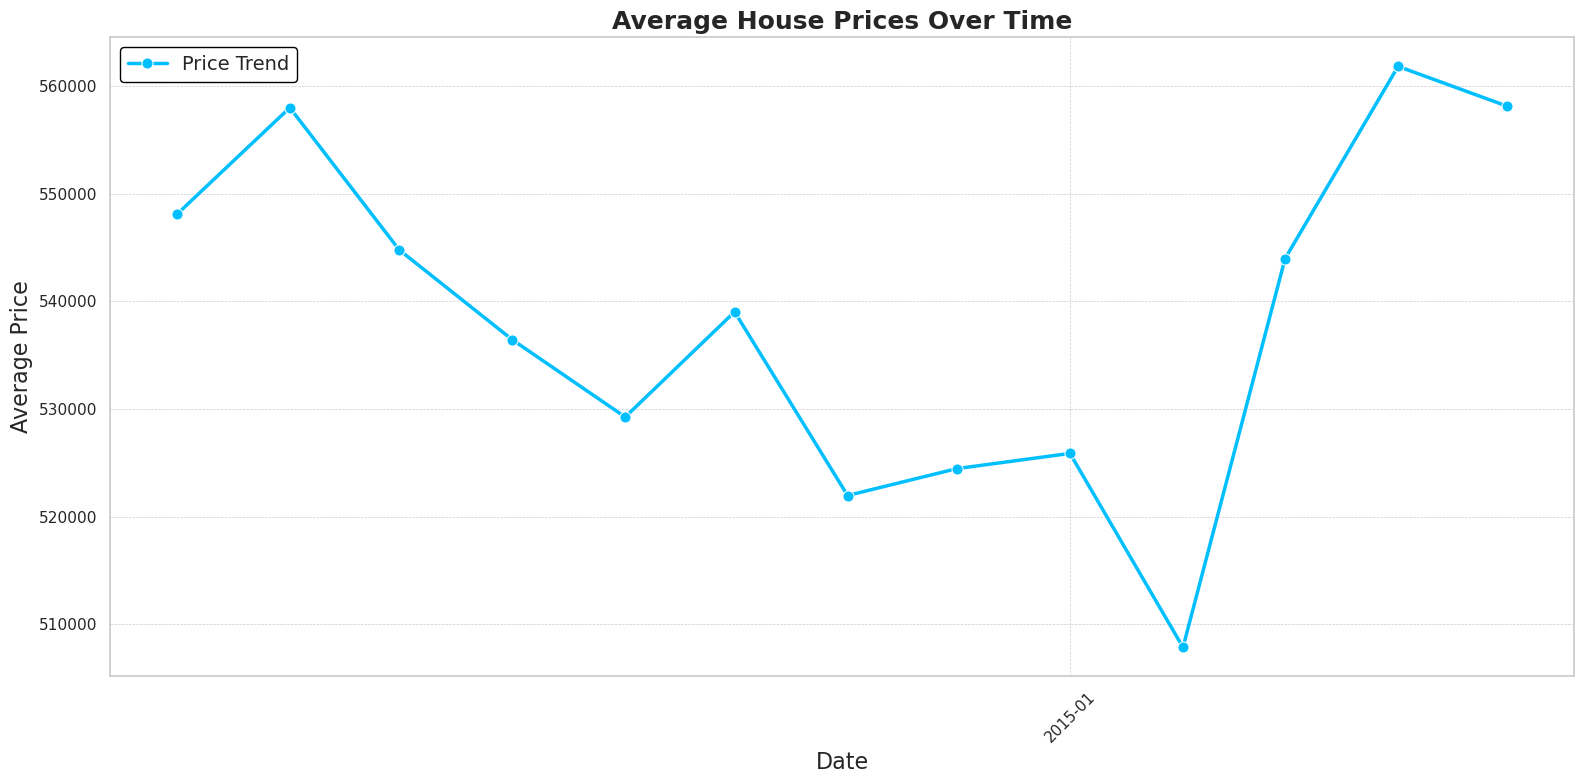

In [32]:
# Group by date and calculate average price
time_data = df.groupby(df['date'].dt.to_period("M")).mean()

# Ensure the data is sorted by date if it's not already
time_data = time_data.sort_index()

# Plotting with enhanced aesthetics
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# Create a lineplot
ax = sns.lineplot(data=time_data, x=time_data.index.to_timestamp(), y='price', marker='o', markersize=8, color='deepskyblue', linewidth=2.5)

# Setting title and labels with enhanced font sizes
ax.set_title('Average House Prices Over Time', fontsize=18, fontweight='bold')
ax.set_xlabel('Date', fontsize=16, fontweight='regular')
ax.set_ylabel('Average Price', fontsize=16, fontweight='regular')

# Improve the x-axis date formatting and tick placement
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Add a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding a legend with custom settings
plt.legend(['Price Trend'], facecolor='white', framealpha=1, edgecolor='black', fontsize=14)

# Tight layout for better spacing
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
import folium

# Create a map
mean_lat, mean_long = df['lat'].mean(), df['long'].mean()
m = folium.Map(location=[mean_lat, mean_long], zoom_start=10)

# Add points
for index, row in df.iterrows():
    folium.CircleMarker(
        location=(row['lat'], row['long']),
        radius=5,  # fixed radius for all points
        popup=f'${row["price"]} {row["bedrooms"]} bedrooms',
        color='blue' if row['price'] > 800000 else 'green',  # Conditional color
        fill=True
    ).add_to(m)

# Display the map
m.save('map.html')  # Saves the map to an HTML file

### 3. Prepare Data
a) Data Cleaning
b) Feature Selection
c) Data Transforms

##### Extracting numeric features from Date

In [33]:
# Extract date components
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek
df['dayofyear'] = df['date'].dt.dayofyear

# Calculate elapsed time in days from a reference date
reference_date = df['date'].min()
df['days_since_reference'] = (df['date'] - reference_date).dt.days

# Cyclical features
df['day_sin'] = np.sin(df['dayofweek'] * (2. * np.pi / 7))
df['day_cos'] = np.cos(df['dayofweek'] * (2. * np.pi / 7))
df['month_sin'] = np.sin((df['month'] - 1) * (2. * np.pi / 12))
df['month_cos'] = np.cos((df['month'] - 1) * (2. * np.pi / 12))

# Drop the original date column if no longer needed
df = df.drop('date', axis=1)

##### Imputing Missing Values in `bedrooms` and `bathrooms` using Linear Regression

In [34]:
def impute_missing_values(df, target_columns):
    # Drop the 'price' column as it's not needed for imputation
    df_features = df.drop('price', axis=1)

    # Iterate over each target column to be imputed
    for target in target_columns:
        # Find rows where the target column is not NaN and all other target columns are not NaN
        non_missing_mask = df_features[target_columns].notnull().all(axis=1)
        df_non_missing = df_features.loc[non_missing_mask]

        # Split the data into predictors and the target
        X_train = df_non_missing.drop(target_columns, axis=1)
        y_train = df_non_missing[target]

        # Find rows where the target column is NaN
        missing_mask = df_features[target].isnull()
        df_missing = df_features.loc[missing_mask]

        # Train the model on non-missing data
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict and impute the missing values if there are any
        if not df_missing.empty:
            X_missing = df_missing.drop(target_columns, axis=1)
            df.loc[missing_mask, target] = model.predict(X_missing)

    return df

In [35]:
df = impute_missing_values(df.copy(), ['bedrooms','bathrooms'])
df.isna().sum()

Unnamed: 0              0
id                      0
price                   0
bedrooms                0
bathrooms               0
sqft_living             0
sqft_lot                0
floors                  0
waterfront              0
view                    0
condition               0
grade                   0
sqft_above              0
sqft_basement           0
yr_built                0
yr_renovated            0
zipcode                 0
lat                     0
long                    0
sqft_living15           0
sqft_lot15              0
year                    0
month                   0
day                     0
dayofweek               0
dayofyear               0
days_since_reference    0
day_sin                 0
day_cos                 0
month_sin               0
month_cos               0
dtype: int64

### Data Preparation

In [36]:
df.nunique()

Unnamed: 0              21613
id                      21436
price                    4028
bedrooms                   25
bathrooms                  39
sqft_living              1038
sqft_lot                 9782
floors                      6
waterfront                  2
view                        5
condition                   5
grade                      12
sqft_above                946
sqft_basement             306
yr_built                  116
yr_renovated               70
zipcode                    70
lat                      5034
long                      752
sqft_living15             777
sqft_lot15               8689
year                        2
month                      12
day                        31
dayofweek                   7
dayofyear                 356
days_since_reference      372
day_sin                     7
day_cos                     7
month_sin                  12
month_cos                  12
dtype: int64

Based on the unique value counts you provided, let's classify the columns into categorical and continuous variables:

### Categorical Variables
- **id** (21436 unique values): Generally a unique identifier, but high cardinality might be treated differently.
- **waterfront** (2 unique values): Binary (yes/no) feature.
- **view** (5 unique values): Ordinal category.
- **condition** (5 unique values): Ordinal category.
- **grade** (12 unique values): Ordinal category.
- **zipcode** (70 unique values): Nominal category.
- **year** (2 unique values): Categorical, if it represents something like "before/after" a certain event.
- **month** (12 unique values): Nominal category.
- **day** (31 unique values): Nominal category.
- **dayofweek** (7 unique values): Nominal category.
- **dayofyear** (356 unique values): High cardinality, typically treated as continuous but represents specific day in the year.

### Continuous Variables
- **Unnamed: 0** (21613 unique values): Looks like an index or another identifier.
- **price** (4028 unique values): Typically a target variable in housing datasets.
- **bedrooms** (25 unique values): Integer counts can be treated as either categorical or numerical depending on context.
- **bathrooms** (39 unique values): Continuous, often includes half bathrooms as 0.5.
- **sqft_living** (1038 unique values): Continuous.
- **sqft_lot** (9782 unique values): Continuous.
- **floors** (6 unique values): Could be ordinal or continuous.
- **sqft_above** (946 unique values): Continuous.
- **sqft_basement** (306 unique values): Continuous.
- **yr_built** (116 unique values): Typically continuous as it represents a year.
- **yr_renovated** (70 unique values): Continuous, years when renovations occurred.
- **lat** (5034 unique values): Continuous, latitude.
- **long** (752 unique values): Continuous, longitude.
- **sqft_living15** (777 unique values): Continuous, referring to the living area in 2015.
- **sqft_lot15** (8689 unique values): Continuous.
- **days_since_reference** (372 unique values): Continuous, days counted from a reference date.
- **day_sin** (7 unique values), **day_cos** (7 unique values): Derived trigonometric functions of day, could be treated as continuous.
- **month_sin** (12 unique values), **month_cos** (12 unique values): Derived trigonometric functions of month, could be treated as continuous.

### Data Preparation Steps
For categorical variables, we'll use one-hot encoding or ordinal encoding. For continuous variables, we'll apply scaling. We shall drop columns that won't add any value to predicting the price. 
The following cells include:
* Feature Selection
* Data Transformations

In [39]:
df.columns

Index(['Unnamed: 0', 'id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'day',
       'dayofweek', 'dayofyear', 'days_since_reference', 'day_sin', 'day_cos',
       'month_sin', 'month_cos'],
      dtype='object')

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], train_size=0.8, random_state=7)

In [43]:
# Define categorical and continuous features, and select features
categorical_features = ['waterfront', 'view', 'condition', 'grade', 'year', 'month', 'day', 'dayofweek']
continuous_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
                       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'days_since_reference',
                       'day_sin', 'day_cos', 'month_sin', 'month_cos']

# Create transformers for categorical and continuous features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
continuous_transformer = StandardScaler()

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('cont', continuous_transformer, continuous_features)
    ])

# Transform the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [59]:
X_train_transformed.toarray().shape

(17290, 94)

### 4. Model Building and Evaluate Algorithms
a) Split-out validation dataset
b) Test options and evaluation metric
c) Spot Check Algorithms
d) Compare Algorithms

In [61]:
from sklearn.tree import DecisionTreeRegressor

# Split the training data into training and validation sets
X_train_main, X_val, y_train_main, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=7)

# Prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('CART', DecisionTreeRegressor(random_state=7)))
models.append(('RF', RandomForestRegressor(random_state=7)))
models.append(('GBR', GradientBoostingRegressor(random_state=7)))
models.append(('SVR', SVR()))

In [63]:
from sklearn.model_selection import KFold

# Evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'  # Negative MAE because cross_val_score aims to maximize the utility function

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train_main, y_train_main, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})"
    print(msg)

LR: -124618.534 (2704.825)
CART: -102716.031 (3019.333)
RF: -70039.802 (1994.409)
GBR: -75538.496 (2179.334)
SVR: -220785.807 (7376.423)


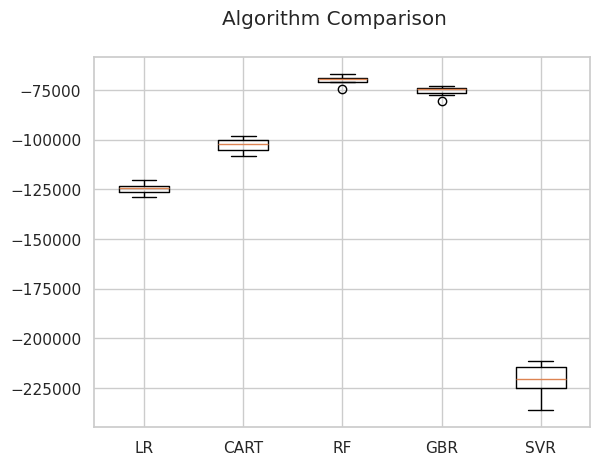

LR - Train Error: 124320.354, Test Error: 128339.487
CART - Train Error: 0.000, Test Error: 110405.104
RF - Train Error: 25737.874, Test Error: 73942.436
GBR - Train Error: 70285.548, Test Error: 80863.876
SVR - Train Error: 220780.536, Test Error: 228754.083


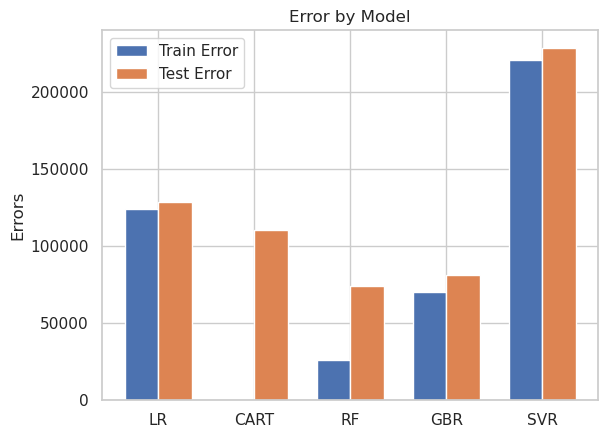

In [65]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Further detailed evaluation with train and test errors visualization
train_errors = []
test_errors = []

for name, model in models:
    model.fit(X_train_main, y_train_main)
    train_pred = model.predict(X_train_main)
    test_pred = model.predict(X_val)
    train_error = mean_absolute_error(y_train_main, train_pred)
    test_error = mean_absolute_error(y_val, test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    print(f"{name} - Train Error: {train_error:.3f}, Test Error: {test_error:.3f}")

# Plotting train and test errors
x = np.arange(len(names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_errors, width, label='Train Error')
rects2 = ax.bar(x + width/2, test_errors, width, label='Test Error')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Errors')
ax.set_title('Error by Model')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()

plt.show()

### 5. Improve Accuracy
a) Algorithm Tuning
b) Ensembles

In [76]:
from sklearn.model_selection import GridSearchCV

# Define parameters grid for Random Forest
param_grid = {
    'n_estimators': [300, 200],  # Number of trees
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [None, 10, 100],
    'min_samples_split': [2, 4],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required at each leaf node
}

# Initialize the RF regressor
rf = RandomForestRegressor(random_state=7)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=4, scoring='neg_mean_absolute_error', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)
best_rf = grid_search.best_estimator_

[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=100, subsample=0.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, max_features=sqrt, n_estimators=100, subsample=0.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, max_features=sqrt, n_estimators=100, subsample=1.0; total time=   1.2s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, n_estimators=200, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, n_estimators=100, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.7; total time=  14.4s
[CV] END learning_rate=0.01, max_depth=3, max_features=log2, n_estimators=100, subsample=0.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, max_features=sqrt, n_estimators=200, subsample=0.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, max_features=sqrt, n_estimators=200, subsample=1.0; total time=   2.3s
[CV]

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for Gradient Boosting
param_grid_gbr = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.2],
    'max_depth': [3, 6],
    'subsample': [0., 1.0],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the GBR model
gbr = GradientBoostingRegressor(random_state=7)

# Setup the GridSearchCV
grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error', verbose=2)
grid_search_gbr.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for GBR:", grid_search_gbr.best_params_)
print("Best score for GBR:", -grid_search_gbr.best_score_)

# Retrieve the best GBR model
best_gbr = grid_search_gbr.best_estimator_
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/home/crow/miniconda3/envs/small-projects-ml/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/home/crow/miniconda3/envs/small-projects-ml/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/crow/miniconda3/envs/small-projects-ml/lib/python3.11/site-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/home/crow/miniconda3/envs/small-projects-ml/lib/python3.11/site-packages/sklearn/base

Best parameters for GBR: {'learning_rate': 0.2, 'max_depth': 6, 'max_features': None, 'n_estimators': 200, 'subsample': 1.0}
Best score for GBR: 68444.80175659088


In [77]:
class AveragingModel:
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)

    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models
        ])
        return np.mean(predictions, axis=1)

ensemble_model = AveragingModel(models=[best_rf, best_gbr])
ensemble_model.fit(X_train, y_train)

### 6. Finalize Model
a) Predictions on validation dataset
b) Create standalone model on entire training dataset
c) Save model for later use

In [79]:
ensemble_pred = ensemble_model.predict(X_test)
ensemble_test_error = mean_absolute_error(y_test, ensemble_pred)
print(f"Test MAE for Ensemble Model: {ensemble_test_error:.3f}")

Test MAE for Ensemble Model: 30330.015


In [80]:
import joblib

# Save the ensemble model to disk
joblib.dump(ensemble_model, 'ensemble_model.joblib')

['ensemble_model.joblib']

The ensemble of **Gradient Boosting Algorithm** and **Random Forest Algorithm** brings the test set error down to **30330.015**.